In [18]:
import numpy as np
import matplotlib.pyplot as plt
radius = 1
diffusion = 10
refinement_vec = [0, 1, 2, 3, 4, 5, 6]
time_step_vec = [0.1, 0.2, 0.4, 0.5, 0.8, 1.0]
l2_array = np.zeros((len(refinement_vec), len(time_step_vec)))
for i in range(len(refinement_vec)):
    for j in range(len(time_step_vec)):
        refinement = refinement_vec[i]
        time_step = time_step_vec[j]
        curFolder = f"results-phosphorylation/results_rad_{radius}_axisymmetric_refined_{refinement}_dt_{time_step}"
        # try:
        l2norm = np.loadtxt(f"{curFolder}/L2norm.txt")
        # except:
        #     continue
        l2_array[i][j] = l2norm #time_step*np.sum(l2vec)

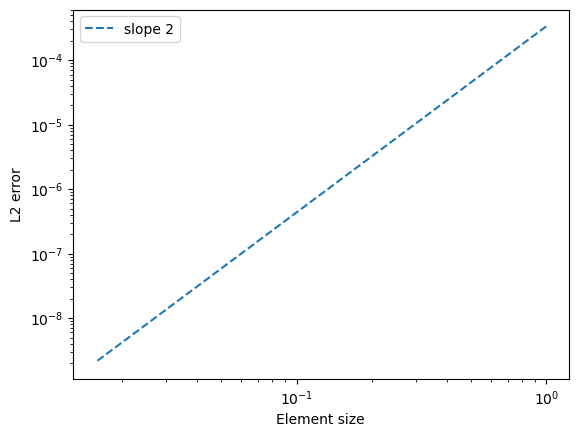

In [28]:
# for i in range(len(time_step_vec)):
#     plt.loglog(2.0**(-np.array(refinement_vec)), l2_array[:,i], label=f"dt = {time_step_vec[i]} s")
plt.loglog(2.0**(-np.array(refinement_vec)), np.exp(-2*np.array(refinement_vec)-8), linestyle = "dashed", label = "slope 2")
plt.ylabel("L2 error")
plt.xlabel("Element size")
plt.legend()

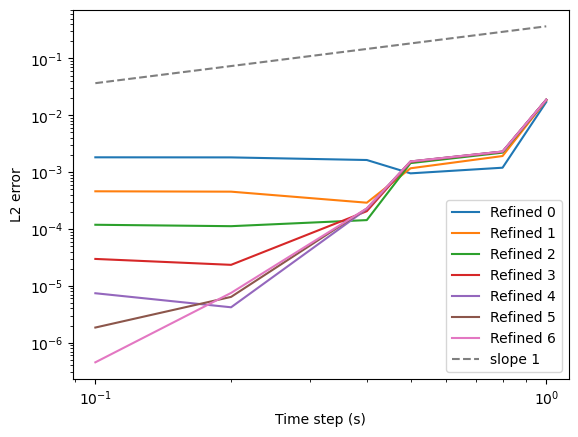

In [30]:
for i in range(len(refinement_vec)):
    plt.loglog(time_step_vec, l2_array[i,:], label=f"Refined {refinement_vec[i]}")
plt.loglog(time_step_vec, np.exp(1*np.log(np.array(time_step_vec))-1), linestyle = "dashed", label = "slope 1")
plt.ylabel("L2 error")
plt.xlabel("Time step (s)")
plt.legend()

In [ ]:
import dolfin as d

comparison_mesh = d.Mesh(d.MPI.comm_world)
mesh_filename = "meshes-phosphorylation/curRadius_1_axisymmetric_refined_6/DemoSphere.h5"
hdf5 = d.HDF5File(comparison_mesh.mpi_comm(), mesh_filename, "r")
hdf5.read(comparison_mesh, "/mesh", False)
cell_markers = d.MeshFunction("size_t", comparison_mesh, 2, value=0)
hdf5.read(cell_markers, f"/mf2")
hdf5.close()
cyto_comparison_mesh = d.create_meshview(cell_markers, 1)
Vref = d.FunctionSpace(cyto_comparison_mesh, "P", 1)
Aphos_sol = d.Function(Vref)
comparison_file = d.XDMFFile(f"results_rad_1_axisymmetric_refined_6_dt_0.01_checkpoint/Aphos.xdmf")
comparison_file.read_checkpoint(Aphos_sol, "u", 0)

comparison_mesh2 = d.Mesh(d.MPI.comm_world)
mesh_filename2 = "meshes-phosphorylation/curRadius_1_axisymmetric_refined_4/DemoSphere.h5"
hdf5 = d.HDF5File(comparison_mesh.mpi_comm(), mesh_filename, "r")
hdf5.read(comparison_mesh2, "/mesh", False)
cell_markers2 = d.MeshFunction("size_t", comparison_mesh2, 2, value=0)
hdf5.read(cell_markers2, f"/mf2")
hdf5.close()
cyto_comparison_mesh2 = d.create_meshview(cell_markers2, 1)
V2 = d.FunctionSpace(cyto_comparison_mesh2, "P", 1)
Aphos2 = d.Function(V2)
vals = Aphos2.vector().get_local()
coords = V2.tabulate_dof_coordinates()
for i in range(len(coords)):
    vals[i] = Aphos_sol(coords[i])
Aphos2.vector().set_local(vals)
Aphos2.vector().apply("insert")